<a href="https://colab.research.google.com/github/arturbernardo/benfords_law_2022/blob/main/Benford_Distribution_Por_Local_de_Vota%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise dos votos das eleições de 2022 na perspectiva da lei de Benford.

https://en.wikipedia.org/wiki/Benford%27s_law

---



**Importate**:
A lei de Benford não serve para comprovar irregularidades em eleições, mas ela serve como uma interessante ferramenta para que se procure por anomalias.
Sua teoria é complexa, o simples fato de um conjunto de números desviar na distribuição esperada não significa fraude. Usá-la para apontar fraudes sem entender a teoria corretamente é irresponsável.
Essa análise faz parte de uma série de análises feitas por mim, em nenhuma delas eu encontrei nada suspeito no processo eleitoral presidencial de 2022.

In [1]:
import pandas as pd
import plotly.express as px
from google.colab import drive
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
pd.options.display.max_columns = None


In [3]:
drive.mount('/content/drive')


Mounted at /content/drive


In [35]:
all = pd.DataFrame()

states = ['AC', 'AL', 'AM', 'AP', 'DF', 'ES', 'MA', 'MS', 'MG', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'SC', 'SE', 'ZZ', 'TO', 'SP', 'RS', 'CE', 'GO', 'BA']
# states = ['MS']

for state in states:
  st = pd.read_csv('/content/drive/MyDrive/data/eleicoes2022unziped/bweb_2t_'+state+'_311020221535.csv', encoding="ISO-8859-1", sep = ';',
                   dtype={
                            "SG_UF": pd.CategoricalDtype(),
                            "CD_MUNICIPIO": pd.Int64Dtype(),
                            "NR_LOCAL_VOTACAO": pd.Int64Dtype(),
                            "NR_ZONA": pd.Int64Dtype(),
                            "NR_SECAO": pd.CategoricalDtype()
                        })

  st_presidente = st[st.CD_CARGO_PERGUNTA == 1]
  filtered_df = st_presidente.loc[(st_presidente['NR_PARTIDO'] == 13) | (st_presidente['NR_PARTIDO'] == 22)]

  toUnion = [all, filtered_df]

  all = pd.concat(toUnion)

all


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_URNA,DS_TIPO_URNA,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,31/10/2022,15:35:43,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,AC,1392,RIO BRANCO,1,3,1279,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 17:34:43,185,147,38,1,APURADA,1,Nominal,13,LULA,48,2046404,428.953.752.256.007.171.,487.308,90FF9DFC,23/09/2022 08:44:00,1 - 3,#NULO#,30/10/2022 06:01:16,30/10/2022 15:00:59,9,30/10/2022 15:04:47,-1,-1
2,31/10/2022,15:35:43,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,AC,1392,RIO BRANCO,1,3,1279,1,Presidente,22,PL,Partido Liberal,30/10/2022 17:34:43,185,147,38,1,APURADA,1,Nominal,22,JAIR BOLSONARO,96,2046404,428.953.752.256.007.171.,487.308,90FF9DFC,23/09/2022 08:44:00,1 - 3,#NULO#,30/10/2022 06:01:16,30/10/2022 15:00:59,9,30/10/2022 15:04:47,-1,-1
4,31/10/2022,15:35:43,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,AC,1392,RIO BRANCO,1,4,1139,1,Presidente,22,PL,Partido Liberal,30/10/2022 17:25:33,339,259,80,1,APURADA,1,Nominal,22,JAIR BOLSONARO,167,2048249,984.509.427.112.588.751.,686.216,90FF9DFC,23/09/2022 09:34:00,1 - 4,#NULO#,30/10/2022 06:00:01,30/10/2022 15:01:55,13,30/10/2022 15:05:12,-1,-1
5,31/10/2022,15:35:43,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,AC,1392,RIO BRANCO,1,4,1139,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 17:25:33,339,259,80,1,APURADA,1,Nominal,13,LULA,83,2048249,984.509.427.112.588.751.,686.216,90FF9DFC,23/09/2022 09:34:00,1 - 4,#NULO#,30/10/2022 06:00:01,30/10/2022 15:01:55,13,30/10/2022 15:05:12,-1,-1
8,31/10/2022,15:35:43,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,AC,1392,RIO BRANCO,1,5,1031,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 17:28:42,341,260,81,1,APURADA,1,Nominal,13,LULA,72,2048064,984.509.533.412.818.797.,804.743,90FF9DFC,23/09/2022 09:46:00,1 - 5,#NULO#,30/10/2022 06:00:50,30/10/2022 15:02:23,8,30/10/2022 15:05:25,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269569,31/10/2022,15:48:51,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,BA,30007,LUÍS EDUARDO MAGALHÃES,205,210,1171,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 18:24:56,208,193,15,1,APURADA,1,Nominal,13,LULA,25,1016432,757.148.752.850.405.603.,152.278,D530864C,27/09/2022 16:42:00,1 - 210,#NULO#,30/10/2022 08:00:01,30/10/2022 17:00:25,11,30/10/2022 17:02:24,-1,-1
269574,31/10/2022,15:48:51,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,BA,30007,LUÍS EDUARDO MAGALHÃES,205,211,1309,1,Presidente,22,PL,Partido Liberal,30/10/2022 18:10:32,109,87,22,1,APURADA,1,Nominal,22,JAIR BOLSONARO,58,1075408,231.996.595.432.396.438.,158.553,96BD8C44,27/09/2022 20:26:00,1 - 211,#NULO#,30/10/2022 08:00:01,30/10/2022 17:11:29,11,30/10/2022 17:13:15,-1,-1
269576,31/10/2022,15:48:51,2022,0,Eleição Ordinária,407,30/10/2022,2,545,Eleição Geral Federal 2022,BA,30007,LUÍS EDUARDO MAGALHÃES,205,211,1309,1,Presidente,13,PT,Partido dos Trabalhadores,30/10/2022 18:10:32,109,87,22,1,APURADA,1,Nominal,13,LULA,27,1075408,231.996.595.432.396.438.,158.553,96BD8C44,27/09/2022 20:26:00,1 - 211,#NULO#,30/10/2022 08:00:01,30/10/2022 17:11:29,11,30/10/2022 17:13:15,-1,-1
269581,31/10/2022,15:48:51,20

In [36]:
df2 = all[['NR_LOCAL_VOTACAO',
                   'CD_MUNICIPIO',
                   'NR_ZONA',
                   'NR_SECAO',
                   'QT_VOTOS',
                   'QT_APTOS',
                   'QT_COMPARECIMENTO',
                   'CD_CARGO_PERGUNTA',
                   'NR_PARTIDO',
                   'NM_MUNICIPIO',
                   'SG_UF']]

In [37]:
df_lula = df2.loc[(df2['NR_PARTIDO'] == 13)]
df_lula_agg = df_lula.groupby(["CD_MUNICIPIO", "NR_LOCAL_VOTACAO", "NR_PARTIDO", "SG_UF"]).agg({"QT_VOTOS": sum, "QT_APTOS": sum, "QT_COMPARECIMENTO": sum, "NM_MUNICIPIO": max})

df_lula_agg

QT_VOTOS  QT_APTOS  \
CD_MUNICIPIO NR_LOCAL_VOTACAO NR_PARTIDO SG_UF                       
19           1031             13         RO          381      2102   
             1058             13         RO          795      2730   
             1066             13         RO          278      1154   
             1104             13         RO          278      1193   
             1112             13         RO          535      2610   
...                                                  ...       ...   
99180        1015             13         ZZ            9        65   
99287        1015             13         ZZ           13        34   
99317        1015             13         ZZ          156       250   
99430        1015             13         ZZ           11       107   
99473        1015             13         ZZ           11        50   

                                                QT_COMPARECIMENTO  \
CD_MUNICIPIO NR_LOCAL_VOTACAO NR_PARTIDO SG_UF                      
19           1031             13         RO                  1559   
             1058             13         RO                  1922   
             1066             13         RO                   832   
             1104             13         RO                   892   
             1112             13         RO                  1905   
...                                                           ...   
99180        1015             13         ZZ                    25   
99287        1015             13         ZZ                    14   
99317        1015             13         ZZ                   191   
99430        1015             13         ZZ                    21   
99473        1015             13         ZZ                    40   

                                                    NM_MUNICIPIO  
CD_MUNICIPIO NR_LOCAL_VOTACAO NR_PARTIDO SG_UF                    
19           1031             13         RO        GUAJARÁ-MIRIM  
             1058             13         RO        GUAJARÁ-MIRIM  
             1066             13         RO        GUAJARÁ-MIRIM  
             1104             13         RO        GUAJARÁ-MIRIM  
             1112             13         RO        GUAJARÁ-MIRIM  
...                                                          ...  
99180        1015             13         ZZ               NASSAU  
99287        1015             13         ZZ               LUSACA  
99317        1015             13         ZZ                TALIN  
99430        1015             13         ZZ     KINGSTON-JAMAICA  
99473        1015             13         ZZ               BAREIN  

[80853 rows x 4 columns]

In [38]:
df_bolsonaro = df2.loc[(df2['NR_PARTIDO'] == 22)]
df_bolsonaro_agg = df_bolsonaro.groupby(["CD_MUNICIPIO", "NR_LOCAL_VOTACAO", "NR_PARTIDO", "SG_UF"]).agg({"QT_VOTOS": sum, "QT_APTOS": sum, "QT_COMPARECIMENTO": sum, "NM_MUNICIPIO": max})
df_bolsonaro_agg


QT_VOTOS  QT_APTOS  \
CD_MUNICIPIO NR_LOCAL_VOTACAO NR_PARTIDO SG_UF                       
19           1031             22         RO         1136      2102   
             1058             22         RO         1089      2730   
             1066             22         RO          529      1154   
             1104             22         RO          585      1193   
             1112             22         RO         1329      2610   
...                                                  ...       ...   
99180        1015             22         ZZ           14        65   
99287        1015             22         ZZ            1        34   
99317        1015             22         ZZ           23       250   
99430        1015             22         ZZ           10       107   
99473        1015             22         ZZ           25        50   

                                                QT_COMPARECIMENTO  \
CD_MUNICIPIO NR_LOCAL_VOTACAO NR_PARTIDO SG_UF                      
19           1031             22         RO                  1559   
             1058             22         RO                  1922   
             1066             22         RO                   832   
             1104             22         RO                   892   
             1112             22         RO                  1905   
...                                                           ...   
99180        1015             22         ZZ                    25   
99287        1015             22         ZZ                    14   
99317        1015             22         ZZ                   191   
99430        1015             22         ZZ                    21   
99473        1015             22         ZZ                    40   

                                                    NM_MUNICIPIO  
CD_MUNICIPIO NR_LOCAL_VOTACAO NR_PARTIDO SG_UF                    
19           1031             22         RO        GUAJARÁ-MIRIM  
             1058             22         RO        GUAJARÁ-MIRIM  
             1066             22         RO        GUAJARÁ-MIRIM  
             1104             22         RO        GUAJARÁ-MIRIM  
             1112             22         RO        GUAJARÁ-MIRIM  
...                                                          ...  
99180        1015             22         ZZ               NASSAU  
99287        1015             22         ZZ               LUSACA  
99317        1015             22         ZZ                TALIN  
99430        1015             22         ZZ     KINGSTON-JAMAICA  
99473        1015             22         ZZ               BAREIN  

[80742 rows x 4 columns]

In [39]:
df_bolsonaro_agg

QT_VOTOS  QT_APTOS  \
CD_MUNICIPIO NR_LOCAL_VOTACAO NR_PARTIDO SG_UF                       
19           1031             22         RO         1136      2102   
             1058             22         RO         1089      2730   
             1066             22         RO          529      1154   
             1104             22         RO          585      1193   
             1112             22         RO         1329      2610   
...                                                  ...       ...   
99180        1015             22         ZZ           14        65   
99287        1015             22         ZZ            1        34   
99317        1015             22         ZZ           23       250   
99430        1015             22         ZZ           10       107   
99473        1015             22         ZZ           25        50   

                                                QT_COMPARECIMENTO  \
CD_MUNICIPIO NR_LOCAL_VOTACAO NR_PARTIDO SG_UF                      
19           1031             22         RO                  1559   
             1058             22         RO                  1922   
             1066             22         RO                   832   
             1104             22         RO                   892   
             1112             22         RO                  1905   
...                                                           ...   
99180        1015             22         ZZ                    25   
99287        1015             22         ZZ                    14   
99317        1015             22         ZZ                   191   
99430        1015             22         ZZ                    21   
99473        1015             22         ZZ                    40   

                                                    NM_MUNICIPIO  
CD_MUNICIPIO NR_LOCAL_VOTACAO NR_PARTIDO SG_UF                    
19           1031             22         RO        GUAJARÁ-MIRIM  
             1058             22         RO        GUAJARÁ-MIRIM  
             1066             22         RO        GUAJARÁ-MIRIM  
             1104             22         RO        GUAJARÁ-MIRIM  
             1112             22         RO        GUAJARÁ-MIRIM  
...                                                          ...  
99180        1015             22         ZZ               NASSAU  
99287        1015             22         ZZ               LUSACA  
99317        1015             22         ZZ                TALIN  
99430        1015             22         ZZ     KINGSTON-JAMAICA  
99473        1015             22         ZZ               BAREIN  

[80742 rows x 4 columns]

In [40]:
df_lula_local = {}
for x in range(1, 10):
  df_lula_local[x] = df_lula_agg.loc[df_lula_agg['QT_VOTOS'].astype(str).str.startswith(str(x), na=False)]

df_lula_local[2]

QT_VOTOS  QT_APTOS  \
CD_MUNICIPIO NR_LOCAL_VOTACAO NR_PARTIDO SG_UF                       
19           1066             13         RO          278      1154   
             1104             13         RO          278      1193   
             1163             13         RO          207       650   
             1295             13         RO          257       368   
35           1058             13         RO         2685     10224   
...                                                  ...       ...   
99015        1155             13         MT          266      1286   
99031        1023             13         MT          234      1336   
99058        1031             13         MT           25       198   
             1139             13         MT          231      1788   
             1147             13         MT          290      2746   

                                                QT_COMPARECIMENTO  \
CD_MUNICIPIO NR_LOCAL_VOTACAO NR_PARTIDO SG_UF                      
19           1066             13         RO                   832   
             1104             13         RO                   892   
             1163             13         RO                   498   
             1295             13         RO                   314   
35           1058             13         RO                  8170   
...                                                           ...   
99015        1155             13         MT                   912   
99031        1023             13         MT                   998   
99058        1031             13         MT                   136   
             1139             13         MT                  1344   
             1147             13         MT                  2049   

                                                         NM_MUNICIPIO  
CD_MUNICIPIO NR_LOCAL_VOTACAO NR_PARTIDO SG_UF                         
19           1066             13         RO             GUAJARÁ-MIRIM  
             1104             13         RO             GUAJARÁ-MIRIM  
             1163             13         RO             GUAJARÁ-MIRIM  
             1295             13         RO             GUAJARÁ-MIRIM  
35           1058             13         RO               PORTO VELHO  
...                                                               ...  
99015        1155             13         MT                  COMODORO  
99031        1023             13         MT     FIGUEIRÓPOLIS D'OESTE  
99058        1031             13         MT         GUARANTÃ DO NORTE  
             1139             13         MT         GUARANTÃ DO NORTE  
             1147             13         MT         GUARANTÃ DO NORTE  

[12348 rows x 4 columns]

In [41]:
df_bolsonaro_local = {}
for x in range(1, 10):
  df_bolsonaro_local[x] = df_bolsonaro_agg.loc[df_bolsonaro_agg['QT_VOTOS'].astype(str).str.startswith(str(x), na=False)]

df_bolsonaro_local[2]

QT_VOTOS  QT_APTOS  \
CD_MUNICIPIO NR_LOCAL_VOTACAO NR_PARTIDO SG_UF                       
19           1163             22         RO          281       650   
35           1015             22         RO         2105      4473   
             1031             22         RO         2329      4839   
             1295             22         RO         2563      6587   
             1350             22         RO         2714      5385   
...                                                  ...       ...   
99058        1104             22         MT          258       418   
             1120             22         MT          238       420   
             1155             22         MT         2205      3394   
99317        1015             22         ZZ           23       250   
99473        1015             22         ZZ           25        50   

                                                QT_COMPARECIMENTO  \
CD_MUNICIPIO NR_LOCAL_VOTACAO NR_PARTIDO SG_UF                      
19           1163             22         RO                   498   
35           1015             22         RO                  3407   
             1031             22         RO                  3879   
             1295             22         RO                  4771   
             1350             22         RO                  4346   
...                                                           ...   
99058        1104             22         MT                   326   
             1120             22         MT                   314   
             1155             22         MT                  2666   
99317        1015             22         ZZ                   191   
99473        1015             22         ZZ                    40   

                                                     NM_MUNICIPIO  
CD_MUNICIPIO NR_LOCAL_VOTACAO NR_PARTIDO SG_UF                     
19           1163             22         RO         GUAJARÁ-MIRIM  
35           1015             22         RO           PORTO VELHO  
             1031             22         RO           PORTO VELHO  
             1295             22         RO           PORTO VELHO  
             1350             22         RO           PORTO VELHO  
...                                                           ...  
99058        1104             22         MT     GUARANTÃ DO NORTE  
             1120             22         MT     GUARANTÃ DO NORTE  
             1155             22         MT     GUARANTÃ DO NORTE  
99317        1015             22         ZZ                 TALIN  
99473        1015             22         ZZ                BAREIN  

[13457 rows x 4 columns]

In [42]:
total_lula_local = 0
df_lula_total_local = {}
for x in range(1, 10):
  total_lula_local = total_lula_local + df_lula_local[x]['QT_VOTOS'].sum()
  df_lula_total_local[x] = total_lula_local
  total_lula_local = 0

df_lula_total_local

{1: 20234374,
 2: 8931856,
 3: 6110810,
 4: 4755318,
 5: 4316266,
 6: 4189718,
 7: 3987736,
 8: 3897045,
 9: 3922876}

In [43]:
total_bolsonaro_local = 0
df_bolsonaro_total_local = {}
for x in range(1, 10):
  total_bolsonaro_local = total_bolsonaro_local + df_bolsonaro_local[x]['QT_VOTOS'].sum()
  df_bolsonaro_total_local[x] = total_bolsonaro_local
  total_bolsonaro_local = 0

df_lula_total_local

{1: 20234374,
 2: 8931856,
 3: 6110810,
 4: 4755318,
 5: 4316266,
 6: 4189718,
 7: 3987736,
 8: 3897045,
 9: 3922876}

In [44]:
total_lula = 0
for k in df_lula_local:
  total_lula = total_lula + df_lula_local[k]['QT_VOTOS'].sum()
total_lula

60345999

In [45]:
total_bolsonaro = 0
for k in df_bolsonaro_local:
  total_bolsonaro = total_bolsonaro + df_bolsonaro_local[k]['QT_VOTOS'].sum()
total_bolsonaro

58206354

In [46]:
dic_lula_percentual = {}

for x in range(1, 10):
  dic_lula_percentual[x] = df_lula_total_local[x]  * 100 / total_lula
dic_lula_percentual

# cem = 0
# for k in dic_lula_percentual:
#   cem = cem + dic_lula_percentual[k]
# cem # (tem de dar 100% a soma)

{1: 33.530597446899506,
 2: 14.801074052979056,
 3: 10.126288571343396,
 4: 7.880088288868993,
 5: 7.152530526505991,
 6: 6.942826482995169,
 7: 6.608119951746925,
 8: 6.457834926222698,
 9: 6.500639752438269}

In [47]:
dic_bolsonaro_percentual = {}

for x in range(1, 10):
  dic_bolsonaro_percentual[x] = df_bolsonaro_total_local[x]  * 100 / total_bolsonaro
dic_bolsonaro_percentual

{1: 32.583554365903076,
 2: 17.17746141598218,
 3: 11.675216764135406,
 4: 9.04540765429149,
 5: 6.384201628571341,
 6: 6.05477539445264,
 7: 5.690387341560682,
 8: 6.165795919806281,
 9: 5.223199515296904}

# `POR URNAS, LULA`

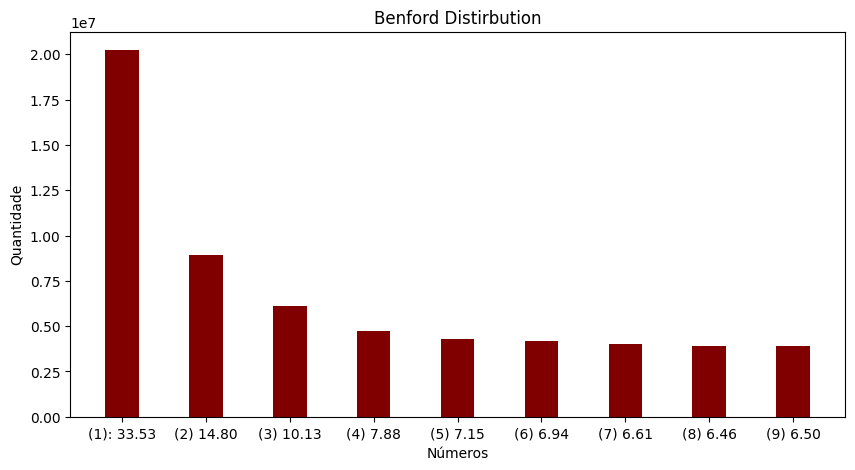

In [48]:
# data = {'1':df_lula_1.size,
#         '2':df_lula_2.size,
#         '3':df_lula_3.size,
#         '4':df_lula_4.size,
#         '5':df_lula_5.size,
#         '6':df_lula_6.size,
#         '7':df_lula_7.size,
#         '8':df_lula_8.size,
#         '9':df_lula_9.size}

labels = ['(1): %.2f' %dic_lula_percentual[1],
        '(2) %.2f' %dic_lula_percentual[2],
        '(3) %.2f' %dic_lula_percentual[3],
        '(4) %.2f' %dic_lula_percentual[4],
        '(5) %.2f' %dic_lula_percentual[5],
        '(6) %.2f' %dic_lula_percentual[6],
        '(7) %.2f' %dic_lula_percentual[7],
        '(8) %.2f' %dic_lula_percentual[8],
        '(9) %.2f' %dic_lula_percentual[9]]

valores = [df_lula_total_local[1],
        df_lula_total_local[2],
        df_lula_total_local[3],
        df_lula_total_local[4],
        df_lula_total_local[5],
        df_lula_total_local[6],
        df_lula_total_local[7],
        df_lula_total_local[8],
        df_lula_total_local[9]]
numbers = list(labels)
amounts = list(valores)
# amounts
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(numbers, amounts, color ='maroon',
        width = 0.4)

plt.xlabel("Números")
plt.ylabel("Quantidade")
plt.title("Benford Distirbution")
plt.show()

# POR URNA, BOLSONARO

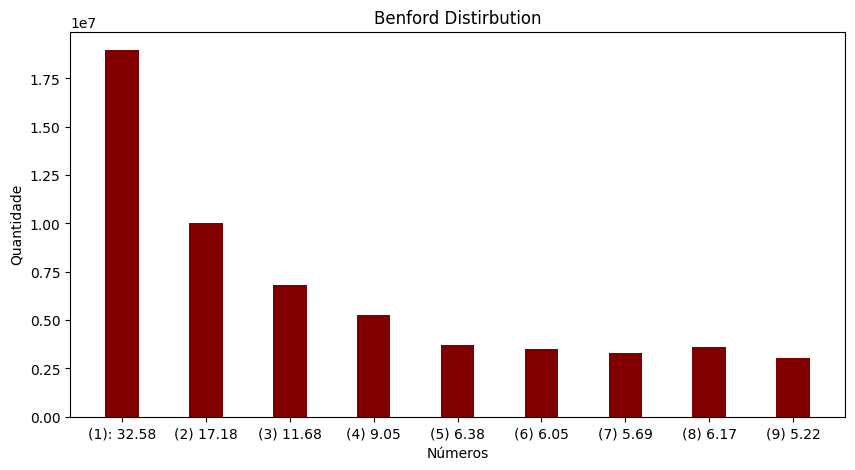

In [49]:
# data = {'1':df_bolsonaro_1.size,
  #         '2':df_bolsonaro_2.size,
  #         '3':df_bolsonaro_3.size,
  #         '4':df_bolsonaro_4.size,
  #         '5':df_bolsonaro_5.size,
  #         '6':df_bolsonaro_6.size,
  #         '7':df_bolsonaro_7.size,
  #         '8':df_bolsonaro_8.size,
  #         '9':df_bolsonaro_9.size}

labels = ['(1): %.2f' %dic_bolsonaro_percentual[1],
          '(2) %.2f' %dic_bolsonaro_percentual[2],
          '(3) %.2f' %dic_bolsonaro_percentual[3],
          '(4) %.2f' %dic_bolsonaro_percentual[4],
          '(5) %.2f' %dic_bolsonaro_percentual[5],
          '(6) %.2f' %dic_bolsonaro_percentual[6],
          '(7) %.2f' %dic_bolsonaro_percentual[7],
          '(8) %.2f' %dic_bolsonaro_percentual[8],
          '(9) %.2f' %dic_bolsonaro_percentual[9]]

valores = [df_bolsonaro_total_local[1],
          df_bolsonaro_total_local[2],
          df_bolsonaro_total_local[3],
          df_bolsonaro_total_local[4],
          df_bolsonaro_total_local[5],
          df_bolsonaro_total_local[6],
          df_bolsonaro_total_local[7],
          df_bolsonaro_total_local[8],
          df_bolsonaro_total_local[9]]
numbers = list(labels)
amounts = list(valores)
# amounts
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(numbers, amounts, color ='maroon',
width = 0.4)

plt.xlabel("Números")
plt.ylabel("Quantidade")
plt.title("Benford Distirbution")
plt.show()